# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
API_URL_base = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{API_URL_base}appid={weather_api_key}&units={units}&q="

#Establish list variables
city_name_lst = []
cloudiness_lst = []
country_lst = []
date_lst =[]
humidity_lst = []
lat_lst =[]
lng_lst = []
max_temp_lst = []
wind_spd_lst = []
index_ctr = 0
set_ctr = 1

print("Starting Data Retrieval")
print("________________________")

#Loop through data
for index, city in enumerate(cities, start = 1):
    try:
        weather_response = requests.get(query_url + city).json()
        city_name_lst.append(weather_response["name"])
        cloudiness_lst.append(weather_response["clouds"]["all"])
        country_lst.append(weather_response["sys"]["country"])
        date_lst.append(weather_response["dt"])
        humidity_lst.append(weather_response["main"]["humidity"])
        lat_lst.append(weather_response["coord"]["lat"])
        lng_lst.append(weather_response["coord"]["lon"])
        max_temp_lst.append(weather_response['main']['temp_max'])
        wind_spd_lst.append(weather_response["wind"]["speed"])
        if index_ctr > 49:
            index_ctr = 0
            set_ctr = set_ctr + 1
    
        else:
            index_ctr = index_ctr + 1
            
        print(f"Processing Record {index_ctr} of Set {set_ctr} : {city}") 
  
    except(KeyError, IndexError):
        print(f"City not found. Skipping... {city}")
        
print("__________________________")
print("Data Retrieval Complete ")    


Starting Data Retrieval
________________________
Processing Record 1 of Set 1 : muli
City not found. Skipping... nizhneyansk
Processing Record 2 of Set 1 : ushuaia
Processing Record 3 of Set 1 : fortuna
Processing Record 4 of Set 1 : punta arenas
Processing Record 5 of Set 1 : mataura
Processing Record 6 of Set 1 : saldanha
Processing Record 7 of Set 1 : alta floresta
Processing Record 8 of Set 1 : busselton
Processing Record 9 of Set 1 : jamestown
Processing Record 10 of Set 1 : mehamn
Processing Record 11 of Set 1 : port alfred
Processing Record 12 of Set 1 : avarua
Processing Record 13 of Set 1 : mandalgovi
Processing Record 14 of Set 1 : nemuro
Processing Record 15 of Set 1 : codrington
Processing Record 16 of Set 1 : kiunga
Processing Record 17 of Set 1 : butaritari
Processing Record 18 of Set 1 : barrow
Processing Record 19 of Set 1 : albany
Processing Record 20 of Set 1 : sheregesh
Processing Record 21 of Set 1 : longyearbyen
City not found. Skipping... tsihombe
City not found. 

Processing Record 34 of Set 4 : marathon
Processing Record 35 of Set 4 : kaitangata
Processing Record 36 of Set 4 : roros
Processing Record 37 of Set 4 : lere
Processing Record 38 of Set 4 : marsh harbour
Processing Record 39 of Set 4 : aleksandrovskoye
City not found. Skipping... ijaki
Processing Record 40 of Set 4 : buzmeyin
Processing Record 41 of Set 4 : narsaq
Processing Record 42 of Set 4 : geraldton
Processing Record 43 of Set 4 : barrhead
Processing Record 44 of Set 4 : arlit
Processing Record 45 of Set 4 : la plata
Processing Record 46 of Set 4 : pangkalanbuun
Processing Record 47 of Set 4 : eregli
Processing Record 48 of Set 4 : barkhera
Processing Record 49 of Set 4 : alofi
Processing Record 50 of Set 4 : greenwood
Processing Record 0 of Set 5 : mapiripan
Processing Record 1 of Set 5 : elliot
Processing Record 2 of Set 5 : coos bay
Processing Record 3 of Set 5 : pringsewu
Processing Record 4 of Set 5 : cidreira
Processing Record 5 of Set 5 : harper
Processing Record 6 of Set

Processing Record 18 of Set 8 : platanos
Processing Record 19 of Set 8 : candolim
Processing Record 20 of Set 8 : kahului
Processing Record 21 of Set 8 : mumford
Processing Record 22 of Set 8 : bassila
Processing Record 23 of Set 8 : terrasini
Processing Record 24 of Set 8 : saiha
Processing Record 25 of Set 8 : sheksna
Processing Record 26 of Set 8 : henties bay
Processing Record 27 of Set 8 : saint george
Processing Record 28 of Set 8 : stropkov
Processing Record 29 of Set 8 : vao
Processing Record 30 of Set 8 : babstovo
Processing Record 31 of Set 8 : madang
Processing Record 32 of Set 8 : kudahuvadhoo
Processing Record 33 of Set 8 : nahrin
Processing Record 34 of Set 8 : coolum beach
Processing Record 35 of Set 8 : lorengau
Processing Record 36 of Set 8 : suicheng
Processing Record 37 of Set 8 : kenora
Processing Record 38 of Set 8 : shinpokh
Processing Record 39 of Set 8 : nardaran
Processing Record 40 of Set 8 : azad shahr
Processing Record 41 of Set 8 : gizo
Processing Record 42

Processing Record 48 of Set 11 : akyab
Processing Record 49 of Set 11 : balkanabat
Processing Record 50 of Set 11 : alugan
Processing Record 0 of Set 12 : angoche
Processing Record 1 of Set 12 : chulym
Processing Record 2 of Set 12 : liuzhou
Processing Record 3 of Set 12 : puerto baquerizo moreno
Processing Record 4 of Set 12 : port augusta
Processing Record 5 of Set 12 : kushima
Processing Record 6 of Set 12 : dalen
Processing Record 7 of Set 12 : baillif
Processing Record 8 of Set 12 : turbat
Processing Record 9 of Set 12 : changji
Processing Record 10 of Set 12 : minjur
Processing Record 11 of Set 12 : vila franca do campo
Processing Record 12 of Set 12 : dharchula
Processing Record 13 of Set 12 : souillac
Processing Record 14 of Set 12 : corinth
Processing Record 15 of Set 12 : port hardy
Processing Record 16 of Set 12 : clifton
Processing Record 17 of Set 12 : brosteni
Processing Record 18 of Set 12 : anadyr
Processing Record 19 of Set 12 : vardo
Processing Record 20 of Set 12 : m

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create DataFrame
weather_df = pd.DataFrame({
    "City": city_name_lst,
    "Cloudiness": cloudiness_lst,
    "Country":country_lst,
    "Date":date_lst,
    "Humidity":humidity_lst,
    "Lat":lat_lst,
    "Lng":lng_lst,
    "Max Temp (F)":max_temp_lst,
    "Wind Speed (mph)":wind_spd_lst
    
})

weather_df.count()


City                588
Cloudiness          588
Country             588
Date                588
Humidity            588
Lat                 588
Lng                 588
Max Temp (F)        588
Wind Speed (mph)    588
dtype: int64

In [6]:
#Display DataFrame
weather_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (F),Wind Speed (mph)
0,Muli,5,MV,1613102521,70,2.9167,73.5667,80.91,15.82
1,Ushuaia,20,AR,1613102522,71,-54.8000,-68.3000,46.40,26.46
2,Fortuna,75,US,1613102523,100,40.5982,-124.1573,48.99,3.24
3,Punta Arenas,0,CL,1613102523,66,-53.1500,-70.9167,46.40,14.97
4,Mataura,0,NZ,1613102523,70,-46.1927,168.8643,60.01,8.01
...,...,...,...,...,...,...,...,...,...
583,Mattru,98,SL,1613102624,92,7.6244,-11.8332,74.28,0.34
584,Matara,41,LK,1613102624,67,5.9485,80.5353,82.51,1.95
585,Oodweyne,91,SO,1613102624,34,9.4092,45.0640,60.73,4.14
586,Tūkrah,19,LY,1613102624,76,32.5341,20.5791,56.03,9.62


In [7]:
#Save data into CSV
weather_df.to_csv("output_data/cities1.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

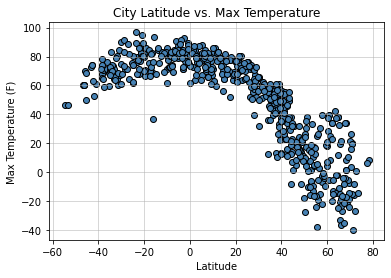

In [30]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp (F)"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


The highest temperature appears to be 85(F) at 0 latitude.  The temperature decreases when the latitude is either negative or positive.

In [11]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Max Temperature.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

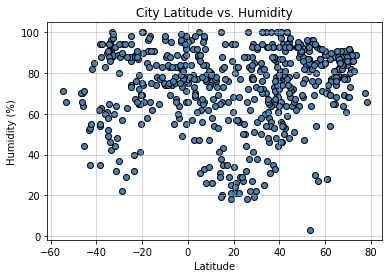

In [29]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


The humidity gets higher as the latitude increases.

In [13]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Humidity.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

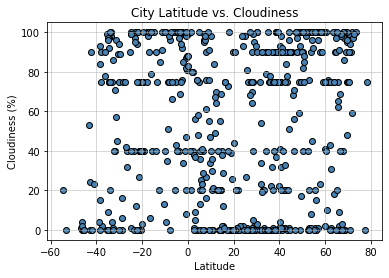

In [28]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

The cloudiness data does not appear to show a pattern relative to latitude. 

In [15]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Cloudiness.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

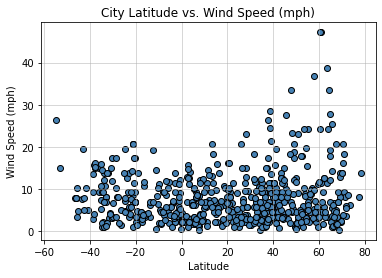

In [27]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed (mph)"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

The wind speed does not show a pattern correlating to the latitude. 

In [17]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Wind Speed.png")

<Figure size 432x288 with 0 Axes>

## Linear Regression

In [18]:
#separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
north_hemi = weather_df.loc[weather_df["Lat"] >= 0]
south_hemi = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.41x + 92.67
The r-squared is: -0.8752771373653245
The regression reflects a negative correlation.
The temprature decreases in the northern hemisphere as you move away from the equator.


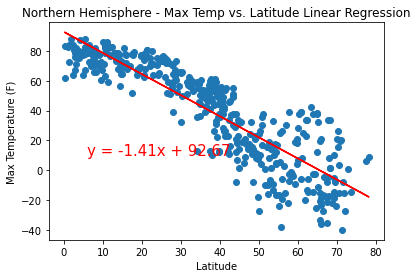

In [19]:
x_val = pd.to_numeric(north_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemi["Max Temp (F)"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression reflects a negative correlation.")
print("The temprature decreases in the northern hemisphere as you move away from the equator.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.37x + 83.21
The r-squared is: 0.5365908168370106
The regression reflects a positive correlation.
The temprature increases in the southern hemisphere as you move away from the equator.


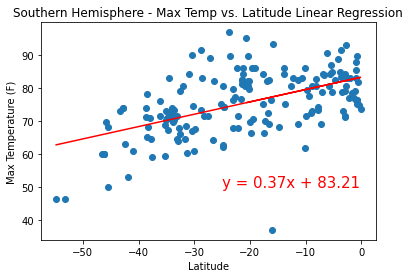

In [20]:
x_val = pd.to_numeric(south_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemi["Max Temp (F)"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression reflects a positive correlation.")
print("The temprature increases in the southern hemisphere as you move away from the equator.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.26x + 62.53
The r-squared is: 0.2636877534617645
The regression reflects a weak positive.


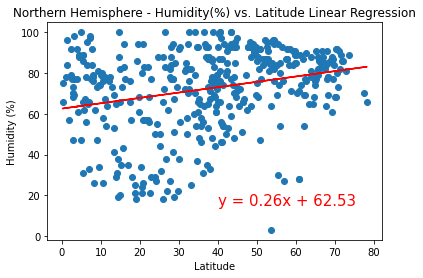

In [21]:
x_val = pd.to_numeric(north_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemi["Humidity"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression reflects a weak positive.")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.29x + 81.44
The r-squared is: 0.231544910220775
The regression reflects a weak positive correlation.


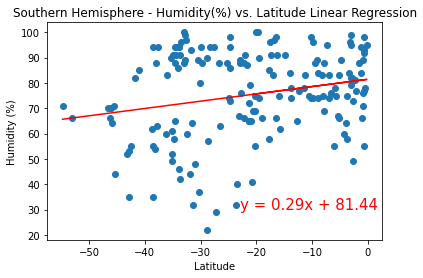

In [22]:
x_val = pd.to_numeric(south_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemi["Humidity"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-23,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression reflects a weak positive correlation.")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.48x + 32.75
The r-squared is: 0.2458817116461471
The regression relects a weak positive.


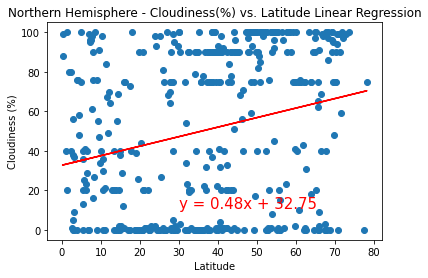

In [23]:
x_val = pd.to_numeric(north_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemi["Cloudiness"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(30,11),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression relects a weak positive.")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 1.03x + 80.93
The r-squared is: 0.3781178310804509
The regression reflects a weak positive correlation.


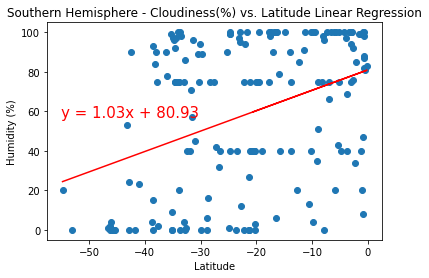

In [24]:
x_val = pd.to_numeric(south_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemi["Cloudiness"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-55,57),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression reflects a weak positive correlation.")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.06x + 5.96
The r-squared is: 0.16913976852728202
The regression reflects a weak positive correlation.


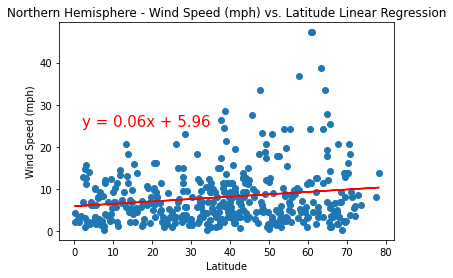

In [25]:
x_val = pd.to_numeric(north_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemi["Wind Speed (mph)"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(2,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression reflects a weak positive correlation.")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.1x + 5.62
The r-squared is: -0.2682861907282221
The regression reflects a weak negative correlation.


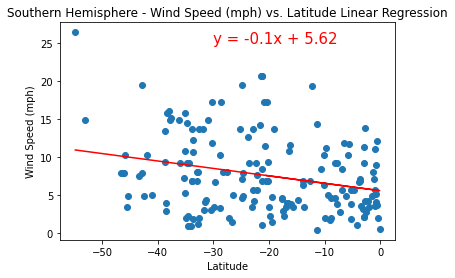

In [26]:
x_val = pd.to_numeric(south_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemi["Wind Speed (mph)"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression reflects a weak negative correlation.")

plt.show()